# Programming assignment 2: Random forests



## Calvin Smith, Bragadesh Bharatwaj Sundararaman, Amogha Udayakumar

In [ ]:
import pandas as pd
import numpy as np 
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

### TASK 1

#### Step 1: Reading the data

In [ ]:
adult_train = pd.read_csv('adult_train.csv')
adult_test = pd.read_csv('adult_test.csv')

In [ ]:
Xtrain = adult_train.drop('target',axis = 1)
Ytrain = adult_train['target']

Xtest = adult_test.drop('target',axis = 1)
Ytest = adult_test['target']

#### Step 2: Encoding the features as numbers

In [ ]:
dicts_training = Xtrain.to_dict('records')
dicts_testing = Xtest.to_dict('records')

In [ ]:
dv = DictVectorizer()
Xtrain_encoded = dv.fit_transform(dicts_training)
Xtest_encoded = dv.transform(dicts_testing)

Trying the Gradient Boosting algorithm:

In [ ]:
clf_GB = GradientBoostingClassifier(random_state=1)
GB_cross_val = np.mean(cross_val_score(clf_GB,Xtrain_encoded,Ytrain))
print(GB_cross_val)

0.8656675592304335


The CV accuracy obtained is 0.86.

Fitting the model to the training data and predicitng on the test set:

In [ ]:
clf_GB.fit(Xtrain_encoded,Ytrain)
Y_GB = clf_GB.predict(Xtest_encoded)
print(accuracy_score(Ytest, Y_GB))

0.8711381364781033


We obtain an accuracy of 0.87.

#### Step 3: Combining the steps

Creating a pipeline with a vectorization step and then a Gradient Boosting Classifier:

In [ ]:
from sklearn.pipeline import make_pipeline 

pipeline = make_pipeline(
    DictVectorizer(),
    GradientBoostingClassifier(random_state = 1)
)

Testing so that the pipeline works by once again fitting the model to training data and predicting on the test set:

In [ ]:
pipeline.fit(dicts_training,Ytrain)
Y_pipe = pipeline.predict(dicts_testing)

In [ ]:
print(accuracy_score(Ytest,Y_pipe))

0.8711381364781033


We obtain the same accracy 0.87 as previously.

### TASK 2: Decision trees and random forests

#### Underfitting and overfitting in decision tree classifiers

The following code plots the accuracies from the decision tree classifiers' predictions on the training and testing sets when increasing the maximum depth.

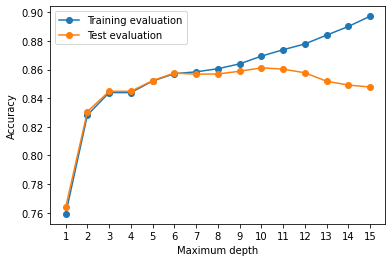

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

train_acc = []
test_acc = []
max_depth = []

for i in range(1,16):
  reg = DecisionTreeClassifier(max_depth = i)
  reg.fit(Xtrain_encoded, Ytrain)
  train_acc.append(accuracy_score(Ytrain,reg.predict(Xtrain_encoded)))
  test_acc.append(accuracy_score(Ytest,reg.predict(Xtest_encoded)))
  max_depth.append(i)


plt.plot(max_depth,train_acc, label="Training evaluation", marker='o')
plt.plot(max_depth,test_acc,label="Test evaluation",marker='o')
plt.xticks(max_depth)
plt.ylabel("Accuracy")
plt.xlabel("Maximum depth")
plt.legend()
plt.show()

We can see a similar effect as in the previous assignment. That is, as we increase the maximum depth the accuracies increase similarly until around 10 when the training set keeps increasing while the test set decreases, which is an indication of overfitting.

### Underfitting and overfitting in random forest classifiers


In [ ]:
from sklearn.ensemble import RandomForestClassifier

def over_under(ensemble_size):

  fig, axs = plt.subplots(2,3,figsize =(20,10))

  col = - 1
  row = 0

  for j in range(len(ensemble_size)):

    col = col +1

    if col > 2:
      col = 0
      row = 1

    train_acc = []
    test_acc = []
    max_depth = []

    for i in range(1,16):
      reg = RandomForestClassifier(n_estimators = ensemble_size[j],max_depth = i,n_jobs=-1)
      reg.fit(Xtrain_encoded, Ytrain)
      train_acc.append(accuracy_score(Ytrain,reg.predict(Xtrain_encoded)))
      test_acc.append(accuracy_score(Ytest,reg.predict(Xtest_encoded)))
      max_depth.append(i)
    
  
  
    axs[row][col].plot(max_depth,train_acc,label = 'Training Evaluation',marker = 'o')
    axs[row][col].plot(max_depth,test_acc,label = 'Testing Evaluation',marker = 'o')
    axs[row][col].set_xticks(max_depth)
    axs[row][col].set_xlabel("Maximum depth")
    axs[row][col].set_ylabel("Accuracy")
    axs[row][col].set_title(f"Nr of trees = {ensemble_size[j]}")

  plt.show()



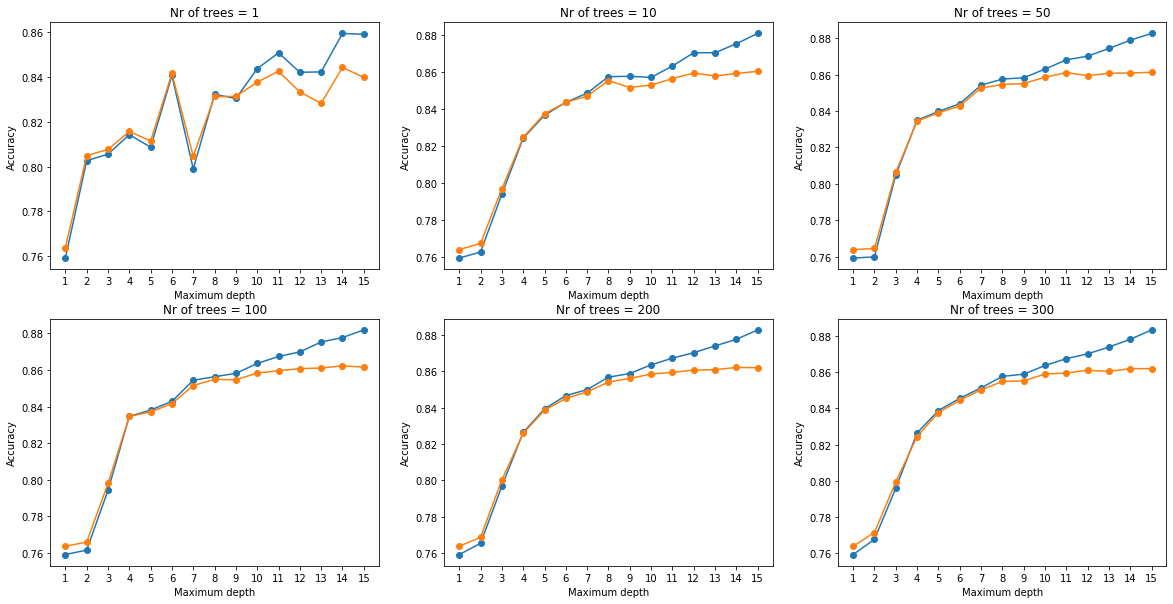

In [ ]:
over_under(ensemble_size = [1,10,50,100,200,300])

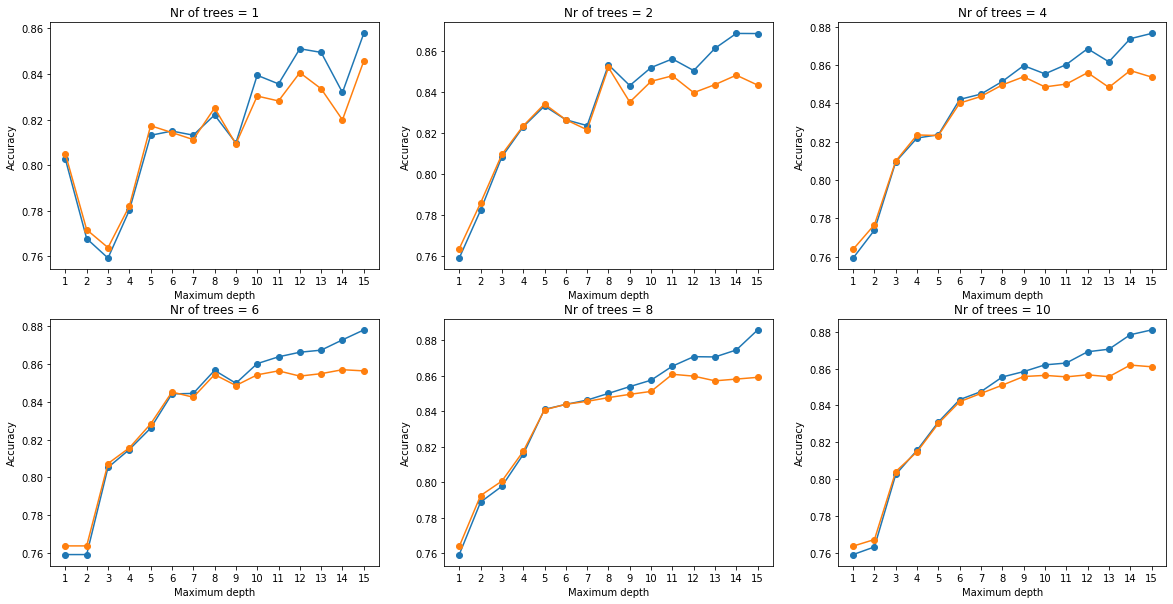

In [ ]:
over_under(ensemble_size = [1,2,4,6,8,10])

- The curve of the decision tree is smooth while the curve of the random forrest with an ensemble size of 1 is jagged, i.e. even the training accuracy increases and decreases with increase in maximum depth. This is because while the decision tree takes into account all the features at each split, the random forest takes only a random subset of the features into account.

- The curve for the random forest smoothens as the ensemble size increases. This makes sense as the more trees that we grow should theoretically reduce the variance.

- With an increasing ensemble size, the best observed test set accuracy seems to increase until around 0.86 at an ensemble size of 8 and then stabilizes and doesn't change much.

- As the ensemble size grows the training time increases. This is obvious as more number of decision trees have to be trained with increase in ensemble size.

TASK 3: Feature importances in random forest classifiers

In [ ]:
#Choosing the best RF model from previous task.
opt_rf = RandomForestClassifier(n_estimators = 300,max_depth = 8, n_jobs = -1)
opt_rf.fit(Xtrain_encoded,Ytrain)

RandomForestClassifier(max_depth=8, n_estimators=300, n_jobs=-1)

In [ ]:
# Creating a dataframe with feature names and feature importance
feature_df = pd.DataFrame(columns={'Feature name','Importance'})
feature_df['Feature name'] = dv.feature_names_
feature_df['Importance'] = opt_rf.feature_importances_
feature_df.sort_values(by = 'Importance')
feature_df.sort_values(by = 'Importance',ascending = False,inplace = True)

In [ ]:
# Top 10 features by feature importance
feature_df[0:10]

,Importance,Feature name
23,0.184896,marital-status=Married-civ-spouse
1,0.152960,capital-gain
3,0.108048,education-num
90,0.101312,relationship=Husband
25,0.055446,marital-status=Never-married
0,0.051120,age
20,0.041413,hours-per-week
2,0.029364,capital-loss
74,0.025395,occupation=Exec-managerial
13,0.025000,education=Bachelors


The top three features ranked by importance are marital status (Married), capital gain and education in years. This is becuse these feature values have obtained the lowest Gini impurity score. This essentially means that the split at these features created the most homogenous subsets.

A feature being important here is an indication of that feature value being a good split for creating the tree nodes. It does not state if the particular feature value puts you in the >=50k class or <50k class. However, it indicates that the feature is important in the sense that it is good at discriminating between the classes. For example, the capital gain is a good way of discriminating between the classes but we don't know if a high or low capital gain places them in the higher or lower classes. Although, from common sense we could assume that a higher capital gain is an indication of a high income.





Another way of measuring feature importance is to use permutation importance. Assume we have trained a Random Forest model and computed the accuracy on a test set. We then permute the column values for each feature (one at a time) and then pass the permuted test set to the model again and calculate the new accuracy. If the difference between the baseline accuracy and the new accuracy is large, the this is an indication that the feature is important and vice versa. 

Instead of permuting feature values we can also drop the whole column corresponding to a particular feature and calculate the accuracy on a set without that column (feauture) and if the accuracy decreases by a large amount this could mean that the feature is important. Similarly if the accuracy doesn't change much or even increases the feature has very low importance or could heavily correlated to some other feature.

